<a href="https://colab.research.google.com/github/manoj-bheemireddy/paddy-plant-disease-detection-system/blob/main/final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 1s 541ms/step


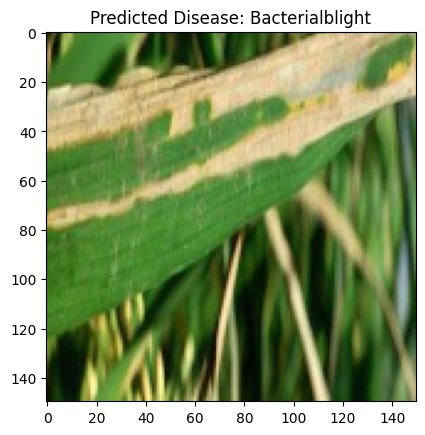

Precautions: Practice good field sanitation
Use pathogen-free seeds
Apply appropriate fertilizers and pesticides
  
Solutions: Spray copper-based bactericides
Ensure good drainage and proper irrigation
Apply fungicides


In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/Trained model')

# Load and preprocess the input image
img_path = '/content/drive/MyDrive/Rice-Leaf-Disease-Images/Bacterialblight/BACTERAILBLIGHT3_110.JPG'
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Make a prediction on the input image
preds = model.predict(x)

# Manually specify the class labels and corresponding solutions/precautions
class_details = {
    'Bacterialblight': {
        'precautions': ['Practice good field sanitation', 'Use pathogen-free seeds', 'Apply appropriate fertilizers and pesticides'],
        'solutions': ['Spray copper-based bactericides', 'Ensure good drainage and proper irrigation', 'Apply fungicides']
    },
    'Blast': {
        'precautions': ['Rotate crops', 'Remove diseased plants', 'Avoid overhead watering'],
        'solutions': ['Spray fungicides', 'Use resistant varieties of rice', 'Ensure good drainage and proper irrigation']
    },
    'Brownspot': {
        'precautions': ['Practice crop rotation', 'Ensure good drainage and proper irrigation', 'Remove host plants from vicinity'],
        'solutions': ['Apply fungicides', 'Practice seed treatment with hot water or chemicals']
    },
    'Tungro': {
        'precautions': ['Practice good field sanitation', 'Remove infected plants', 'Plant resistant varieties of rice'],
        'solutions': ['Apply fungicides', 'Use resistant varieties of rice', 'Ensure good drainage and proper irrigation']
    }
}

# Get the predicted class label and its corresponding solutions/precautions
class_labels = list(class_details.keys())
pred_label = class_labels[np.argmax(preds)]
pred_precautions = class_details[pred_label]['precautions']
pred_solutions = class_details[pred_label]['solutions']

# Display the input image and its predicted class label, precautions, and solutions
if pred_label == 'unknown':
    print('Leaf disease not recognized. Please try another image.')
else:
    plt.imshow(img)
    plt.title('Predicted Disease: ' + pred_label)
    plt.show()
    print('Precautions:', '\n'.join(pred_precautions))
    print('  ')
    print('Solutions:', '\n'.join(pred_solutions))
